In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import Wing, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np
import copy
from wingstructure.structure import WingSection

## wing definition

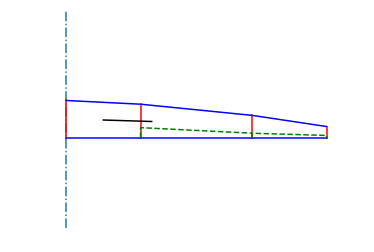

In [5]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = ['ah93157']*4

wing = Wing.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.7)
wing.set_airbrake(1,2.3)

wing.set_flap('QR', 2, 5, (0.3,0.2))
wing.set_flap('QR2', 5, 7, (0.2,0.2))
wing.plot()

coords = np.loadtxt('airfoils/ah93157.dat', skiprows=1)

In [6]:
skins = ( 
            {
                'thickness': 2e-3, #m
                'rho': 30 # kg/m^3
            },
            {
                'thickness': 10e-3, #m
                'rho': 120, # kg/m^3
                'chord-bounds': (0.1, 0.3), #bounds/chord_length
                'span-bounds': (0, 4), # m halfspanwidth
            },
            {
                'thickness': 5e-3, #m
                'rho': 120, # kg/m^3
                'chord-bounds': (0.1, 0.3), #bounds/chord_length
                'span-bounds': (4, 7), # m halfspanwidth
            },
            {
                'thickness': 10e-3, #m
                'rho': 30, # kg/m^3
                'chord-bounds': (0.5, 0.7),
            },
            {
                'thickness': 1.5e-3, #m
                'rho': 30 #kg/m^3
            },
            {
                'thickness': 1.5e-3, #m
                'rho': 30 #kg/m^3
            },
        )

spar = {
            'flange_thickness': 10e-3, #m
            'position': 0.4, # position/chord_length
            'flange_width': 0.07, # width/chord_length
            'flange_rho': 30, #kg/m^3
            'web_position': 0.45, # position/chord_length
            'web_thickness': 7e-3, #m
            'web_rho': 30, #kg/m^3
        }

trailing_web = {
            'thickness': 10e-3, #m
            'offset': 3e-3, #m
            'rho': 30, #kg/m^3
        }

wingsec = WingSection(wing, {'ah93157':coords}, skins, spar, trailing_web)

In [7]:
wingsec.update_geometry(wing.root_pos)

TopologyException: assigned depths do not match at 0.11048917756321722 -0.025352355966609709


ValueError: No Shapely geometry can be created from null value

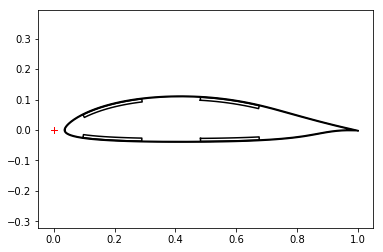

In [8]:
wingsec.plot()

In [9]:
wingsec.inter.bounds

(0.4825, -0.03748676881549507, 0.6755, 0.10777121509244642)

In [10]:
last = None

volume = 0.0

for ii,y in enumerate(np.linspace(wing.root_pos, wing.span_width()/2, 5)):
    print('\nSchnitt: {}'.format(ii))
    wingsec.update_geometry(y)
    current = wingsec.area
    if last:
        volume += (current+last)/2 * (y-ylast)
    last = current
    ylast = y
    plt.figure(ii)
    wingsec.plot()

AttributeError: 'Wing' object has no attribute 'span_width'

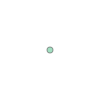

In [15]:
from shapely.geometry import LineString, Polygon

LineString([[0,0],[1,1]]).intersection(LineString([[0,1],[1,0]]))

In [9]:
line = LineString(([0,0],[1,1]))
poly = Polygon([[0,0],[1,0],[0,1]])
poly.intersection(line).length, line.length

(0.7071067811865476, 1.4142135623730951)

In [10]:
line.coords[0:2]

[(0.0, 0.0), (1.0, 1.0)]